In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import numpy as np
import pandas as pd
from sklearn import linear_model


#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
urls_array=[
            "https://www.basketball-reference.com/leagues/NBA_1980_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_1983_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_1985_totals.html"
           ,"https://www.basketball-reference.com/leagues/NBA_1988_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_1990_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_1992_totals.html"
           ,"https://www.basketball-reference.com/leagues/NBA_1995_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_1997_totals.html"
           ,"https://www.basketball-reference.com/leagues/NBA_1999_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2001_totals.html"
          ,"https://www.basketball-reference.com/leagues/NBA_2003_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2005_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2008_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2010_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2012_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2015_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2017_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2019_totals.html"
            ,"https://www.basketball-reference.com/leagues/NBA_2021_totals.html"
           ]

urls_2_array=[
               "https://www.basketball-reference.com/international/fiba-world-cup/2010_totals.html"
                ,"https://www.basketball-reference.com/international/fiba-world-cup/2014_totals.html"
                ,"https://www.basketball-reference.com/international/fiba-world-cup/2019_totals.html"
                ,"https://www.basketball-reference.com/international/cba-china/2012_totals.html"
                ,"https://www.basketball-reference.com/international/cba-china/2014_totals.html"
                ,"https://www.basketball-reference.com/international/cba-china/2016_totals.html"
                ,"https://www.basketball-reference.com/international/cba-china/2018_totals.html"
                ,"https://www.basketball-reference.com/international/cba-china/2020_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2003_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2005_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2007_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2009_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2011_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2013_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2015_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2017_totals.html"
                ,"https://www.basketball-reference.com/international/eurocup/2019_totals.html"
    
]


players=list()
#age_s=list()
p3_s=list()
p3a_s=list()
p3p_s=list()
p2_s=list()
p2a_s=list()
p2p_s=list()
ft_s=list()
fta_s=list()
ftp_s=list()
orb_s=list()
drb_s=list()
ast_s=list()

In [3]:
for url in urls_array:
    html = requests.get(url)
    soup = BeautifulSoup(html.content, "html.parser")
    table = soup.find('table')
    table_rows = table.find_all('tr')
    for tr in table_rows:
        td = tr('td')
        row = [tr.text.strip() for tr in td if tr.text.strip()]
        if row:
            players.append(row[0])
            #age_s.append(row[2])
            p3_s.append(row[10])
            p3a_s.append(row[11])        
            p3p_s.append(row[12])
            p2_s.append(row[13])
            p2a_s.append(row[14])
            p2p_s.append(row[15])
            ft_s.append(row[17])
            fta_s.append(row[18])
            ftp_s.append(row[19])
            orb_s.append(row[20])
            drb_s.append(row[21])
            ast_s.append(row[23])


    for i in range(0,len(p2p_s)):
        if (str(p2p_s[i])[0]!="."):
            p2p_s[i]=999
            
    for i in range(0,len(p3p_s)):
        if (str(p3p_s[i])[0]!="."):
            p3p_s[i]=999

In [4]:
for url2 in urls_2_array:
    html2 = requests.get(url2)
    soup2 = BeautifulSoup(html2.content, "html.parser")
    table2 = soup2.find('table')
    table_rows2 = table2.find_all('tr')
    for tr in table_rows2:
        
        th2=tr('th')
        row2 = [tr.text.strip() for tr in th2 if tr.text.strip()]
        if row2:
            players.append(row2[0])
            
        td2 = tr('td')
        row = [tr.text.strip() for tr in td2 if tr.text.strip()]
        if row:
            p3_s.append(row[6])
            p3a_s.append(row[7])        
            p3p_s.append(row[8])
            p2_s.append(row[9])
            p2a_s.append(row[10])
            p2p_s.append(row[11])
            ft_s.append(row[13])
            fta_s.append(row[14])
            ftp_s.append(row[15])
            orb_s.append(row[16])
            drb_s.append(row[17])
            ast_s.append(row[19])

    players.remove('Player')
            


In [5]:
for i in range(0,len(p2p_s)):
    p3_s[i]=(int)(p3_s[i])
    
    if p3p_s[i]!=999:
        if (p3p_s[i][0]=="."):
            p3p_s[i]=(float)(p3p_s[i])
            p3p_s[i]= p3p_s[i]*100
            p3p_s[i]= round (p3p_s[i],2)
       
    if p2p_s[i]!=999:
        if (p2p_s[i][0]=="."):
            p2p_s[i]=(float)(p2p_s[i])
            p2p_s[i]= p2p_s[i]*100
            p2p_s[i]= round (p2p_s[i],2)
    #print((p3p_s[i]))

  

In [6]:
df = pd.DataFrame({"Player Name":players,"3P":p3_s,"3PA":p3a_s,"3P%":p3p_s,"2P":p2_s,"2PA":p2a_s,"2P%":p2p_s,"FT":ft_s,"FTA":fta_s,"FT%":ftp_s,"ORB":orb_s,"DRB":drb_s,"AST":ast_s})
df.drop_duplicates(subset='Player Name', keep='first', inplace=True)

df = df[df["2P%"]!= 999]
df.shape
df = df[df["3P%"]!=999]
df.shape  

df = df[df["3P"]>3]
df.shape 

df

,Player Name,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST
3,Tiny Archibald*,4,18,22.2,379,776,48.8,361,435,.830,59,138,671
20,Henry Bibby,11,52,21.2,240,574,41.8,226,286,.790,65,143,307
21,Larry Bird*,58,143,40.6,635,1320,48.1,301,360,.836,216,636,370
54,M.L. Carr,12,41,29.3,350,722,48.5,178,241,.739,106,224,156
60,Maurice Cheeks*,4,9,44.4,353,652,54.1,180,231,.779,75,199,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,Trevor Lacey,17,36,47.2,20,42,47.6,7,10,.700,2,33,40
16118,Tyler Larson,6,18,33.3,7,12,58.3,10,13,.769,2,11,10
16123,Victor Rudd,13,36,36.1,22,51,43.1,10,14,.714,7,23,8
16130,Vladislav Trushkin,16,39,41.0,30,54,55.6,7,7,1.000,15,24,11


In [8]:
df_linear=df.drop(['Player Name'], axis=1)
df_linear

,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST
3,4,18,22.2,379,776,48.8,361,435,.830,59,138,671
20,11,52,21.2,240,574,41.8,226,286,.790,65,143,307
21,58,143,40.6,635,1320,48.1,301,360,.836,216,636,370
54,12,41,29.3,350,722,48.5,178,241,.739,106,224,156
60,4,9,44.4,353,652,54.1,180,231,.779,75,199,556
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,17,36,47.2,20,42,47.6,7,10,.700,2,33,40
16118,6,18,33.3,7,12,58.3,10,13,.769,2,11,10
16123,13,36,36.1,22,51,43.1,10,14,.714,7,23,8
16130,16,39,41.0,30,54,55.6,7,7,1.000,15,24,11


In [9]:
df_linear.describe()

,3P
count,2720.000000
mean,24.401838
std,29.786168
min,4.000000
25%,7.000000
50%,13.000000
75%,28.000000
max,226.000000


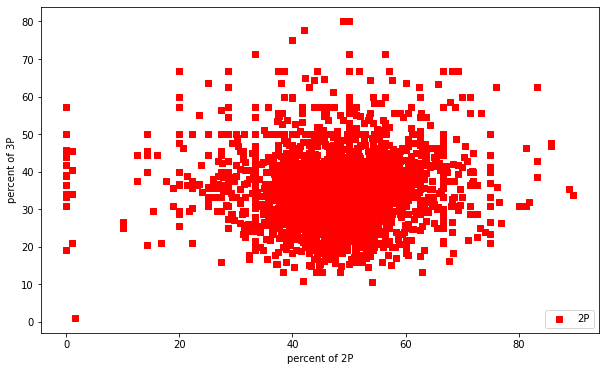

In [10]:
plt.scatter(x=df_linear['2P%'],y=df_linear['3P%'],c='r',marker='s',label='2P')

plt.legend(numpoints=1,loc=4)
plt.xlabel('percent of 2P')
plt.ylabel('percent of 3P')
plt.show()

In [10]:
#m=linear_model.LinearRegression().fit(df.iloc[:,0:1],df.iloc[:,3:])

In [11]:
#plt.scatter(x=df['2P%'],y=df['3P%'],c='k',marker='*',label='Digital')
#plt.plot(df['2P%'],m.predict(df.iloc[:,0:1]),'k',color='blue',linewidth=3)

#plt.xlabel('Digital budget (Thousands of dollars)')
#plt.ylabel('Sales (Thousand units of product)')
#plt.show()

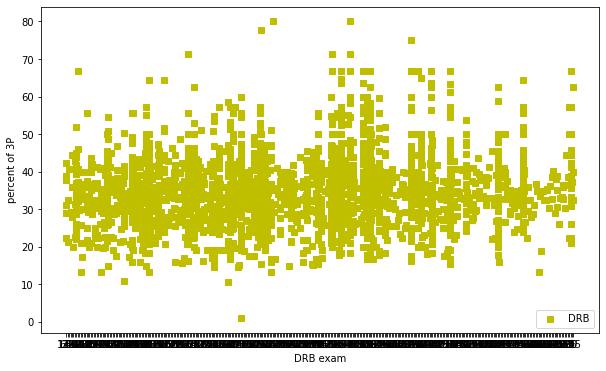

In [11]:
plt.scatter(x=df_linear['DRB'],y=df_linear['3P%'],c='y',marker='s',label='DRB')

plt.legend(numpoints=1,loc=4)
plt.xlabel('DRB exam')
plt.ylabel('percent of 3P')
plt.show()

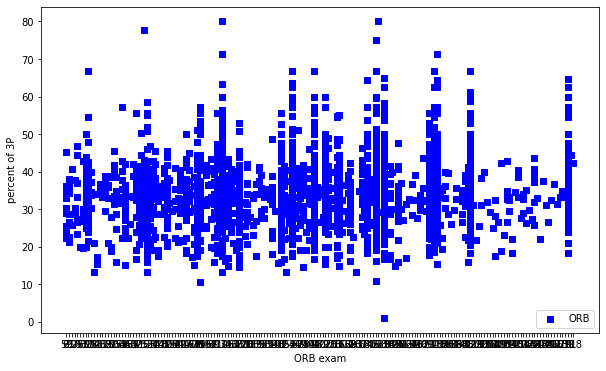

In [12]:
plt.scatter(x=df_linear['ORB'],y=df_linear['3P%'],c='b',marker='s',label='ORB')

plt.legend(numpoints=1,loc=4)
plt.xlabel('ORB exam')
plt.ylabel('percent of 3P')
plt.show()

In [13]:
success=list()
count_succ=0
count_unsucc=0
for i in range(0,len(p3p_s)):
    if(p3p_s[i]!=999):
        if((float)(p3p_s[i])>36):
            success.append(1)
            count_succ=count_succ+1
        else:
            success.append(0)
            count_unsucc=count_unsucc+1
    else: success.append(999)
        
for i in range(0,len(p2p_s)):
    p2p_s[i]=(float)(p2p_s[i])

In [35]:
df_success = pd.DataFrame({"Success":success,"3P":p3_s,"3PA":p3a_s,"3P%":p3p_s,"2P":p2_s,"2PA":p2a_s,"2P%":p2p_s,"FT":ft_s,"FTA":fta_s,"FT%":ftp_s,"ORB":orb_s,"DRB":drb_s,"AST":ast_s})
df_success = df_success[df_success["Success"]!=999]

In [36]:
df_success.describe()

,Success,3P,2P%
count,14184.000000,14184.000000,14184.000000
mean,0.299492,22.243091,47.188517
std,0.458052,36.948180,36.681152
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,42.100000
50%,0.000000,6.000000,47.800000
75%,1.000000,25.000000,53.100000
max,1.000000,378.000000,999.000000


In [21]:
#df_success.plot.scatter(x='2P%',y='Success',s=30);

In [22]:
lrm=linear_model.LogisticRegression()
lrm.fit(df_success[["2P%"]],df_success["Success"])



LogisticRegression()

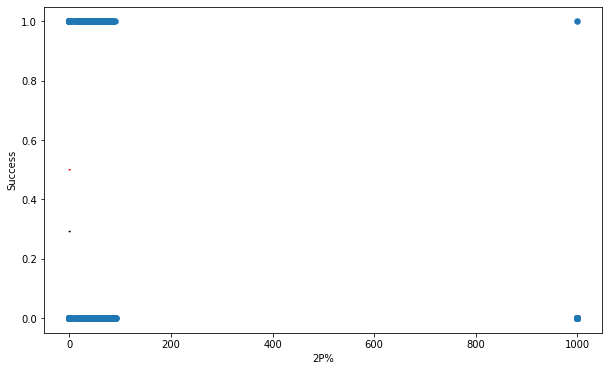

In [23]:
df_success.plot.scatter(x='2P%',y='Success',s=30)

x = np.linspace(df_success['2P%'].min(),df_success['Success'].max(),5000)


y_pred_p=lrm.predict_proba(np.reshape(x, (-1, 1))) # we need to reshape x to get it to a 2 dimensional array


y_pred_p1=[y[1] for y in y_pred_p]


plt.plot(x,y_pred_p1,color='Black')

plt.plot(x,[0.5]*len(x),color="red")
plt.show()

In [24]:
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA

<AxesSubplot:ylabel='None'>

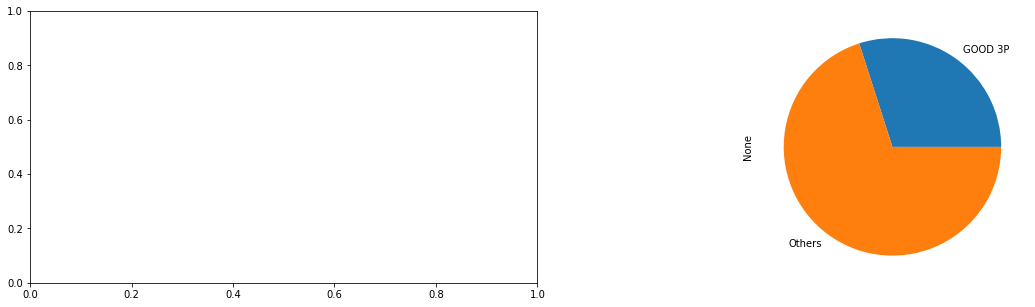

In [25]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_3P = pd.Series([count_succ,count_unsucc], index=['GOOD 3P', 'Others'])
sr_3P.plot(kind='pie', ax=axes[1])

<AxesSubplot:ylabel='None'>

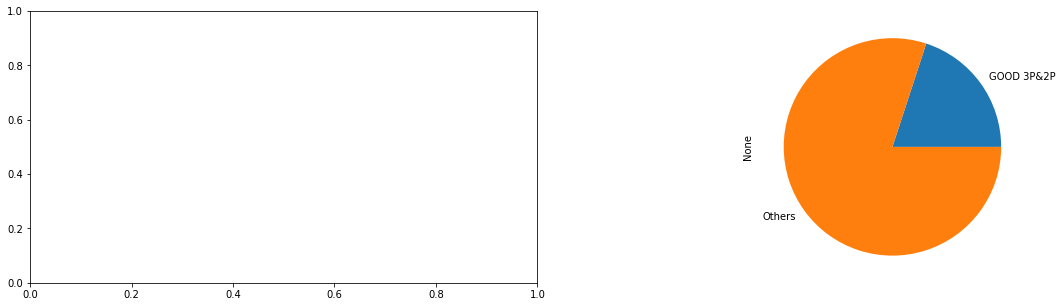

In [26]:
count_3p_2p=0
count_un_3p_2p=0
for i in range(0,len(p3p_s)):
    if(p3p_s[i]!=999):
        if((float)(p3p_s[i])>36)and((float)(p2p_s[i])>45):
            count_3p_2p=count_3p_2p+1
        else:
            count_un_3p_2p=count_un_3p_2p+1
            
fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_3P_2P = pd.Series([count_3p_2p,count_un_3p_2p], index=['GOOD 3P&2P', 'Others'])
sr_3P_2P.plot(kind='pie', ax=axes[1])

<AxesSubplot:ylabel='None'>

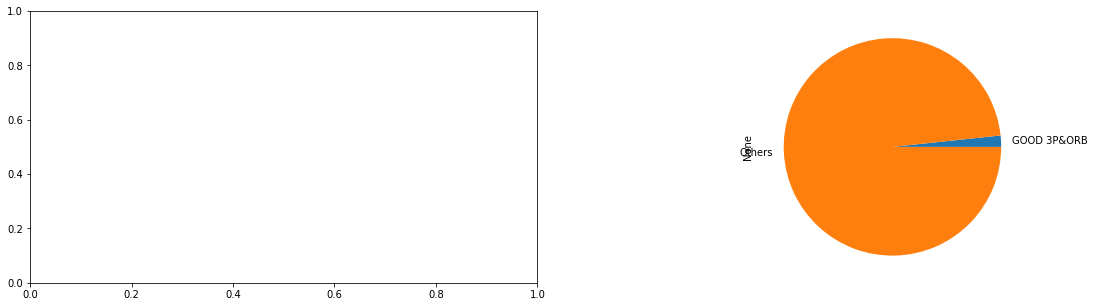

In [27]:
count_3p_orb=0
count_un_3p_orb=0
for i in range(0,len(p3p_s)):
    if(p3p_s[i]!=999):
        if((float)(p3p_s[i])>36)and((float)(orb_s[i])>100):
            count_3p_orb=count_3p_orb+1
        else:
            count_un_3p_orb=count_un_3p_orb+1
            
fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_3P_2P = pd.Series([count_3p_orb,count_un_3p_orb], index=['GOOD 3P&ORB', 'Others'])
sr_3P_2P.plot(kind='pie', ax=axes[1])

<AxesSubplot:ylabel='None'>

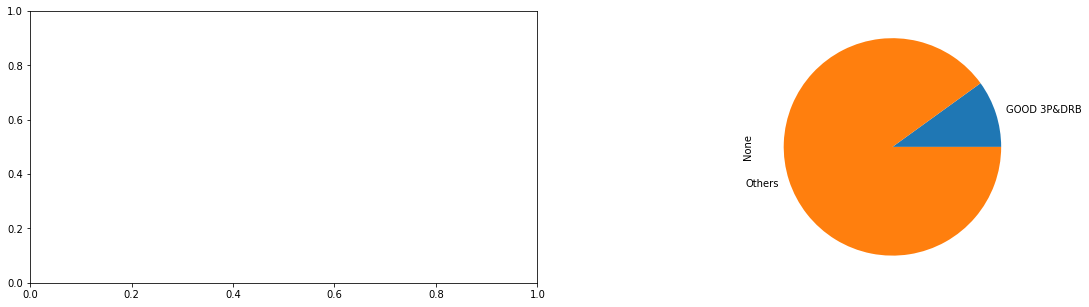

In [28]:
count_3p_drb=0
count_un_3p_drb=0
for i in range(0,len(p3p_s)):
    if(p3p_s[i]!=999):
        if((float)(p3p_s[i])>36)and((float)(drb_s[i])>100):
            count_3p_drb=count_3p_drb+1
        else:
            count_un_3p_drb=count_un_3p_drb+1
            
fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_3P_2P = pd.Series([count_3p_drb,count_un_3p_drb], index=['GOOD 3P&DRB', 'Others'])
sr_3P_2P.plot(kind='pie', ax=axes[1])